# Exploring Covid Vaccin Data From CDC: COVID-19 Vaccination Demographics in the United States

### A description of the dataset
Overall Demographic Characteristics of People Receiving COVID-19 Vaccinations in the United States at national level. Data represents all vaccine partners including jurisdictional partner clinics, retail pharmacies, long-term care facilities, dialysis centers, Federal Emergency Management Agency and Health Resources and Services Administration partner sites, and federal entity facilities. 

Updated: March 10, 2022
Data Provided by IISInfo

### URL of where to find the dataset and explain how to download it
You can download this data here: https://data.cdc.gov/Vaccinations/COVID-19-Vaccination-Demographics-in-the-United-St/km4m-vcsb 

### Questions I'm interested in answering using this dataset:
1. which age group has the highest/lowest fully vaccination people?
2. Does fully vaccination rate differ in ethniciies?
3. When did the fully vaccinated rate peak over all group of people?

In [138]:
import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt

Load the data into a pandas dataframe

In [139]:
data = pd.read_csv('data.csv')
data = data[::-1] # reverse rows, put earlier date rows to the top
data.reset_index(drop=True, inplace=True) # reset index
data

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
0,12/13/2020,Race_eth_known,18404,99.9,75.7,4219,NaN,NaN,99.9,75.8,0.0,0.0,99.9,0.0,0,0
1,12/13/2020,Race_eth_NHAIAN,251,1.4,1.0,39,0.0,0.0,0.9,0.7,0.0,0.0,0.9,0.0,0,0
2,12/13/2020,Age_known,24294,99.9,99.9,5563,NaN,NaN,99.9,99.9,0.0,0.0,99.9,0.0,0,0
3,12/13/2020,Ages_75+_yrs,2992,12.3,12.3,408,0.0,0.0,7.3,7.3,0.0,0.0,7.3,0.0,0,0
4,12/13/2020,Ages_16-17_yrs,194,0.8,0.8,45,0.0,0.0,0.8,0.8,0.0,0.0,0.8,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,03/10/2022,Age_unknown,25768,0.0,0.0,5956,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12680,03/10/2022,Ages_<5yrs,49484,0.0,0.0,19949,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0,0
12681,03/10/2022,Ages_50-64_yrs,58736303,23.1,23.1,51109990,92.3,80.3,23.6,23.6,51.2,27.4,24.5,23.0,26177288,228129
12682,03/10/2022,US,254404423,NaN,100.0,216449810,76.6,65.2,NaN,100.0,45.8,NaN,100.0,NaN,95614292,990978


Use pd.describe() to get a rough overview of the data

In [140]:
data.describe()

,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
count,1.268400e+04,12231.000000,12684.000000,1.268400e+04,9966.000000,9966.000000,12231.000000,12684.000000,12684.000000,12231.000000,12684.000000,12231.000000,1.268400e+04,1.268400e+04
mean,4.038579e+07,23.851549,24.153879,3.370186e+07,43.128216,36.343227,23.651230,24.231307,8.040271,10.539392,26.358428,10.585046,5.265020e+06,6.761446e+05
std,6.162489e+07,31.612173,31.805998,5.356237e+07,31.110463,29.011519,31.672273,32.064950,15.779099,24.749371,34.205817,24.535662,1.573349e+07,1.937049e+06
min,6.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,1.205739e+06,1.000000,1.100000,4.534258e+05,9.700000,3.125000,0.800000,0.900000,0.000000,0.000000,0.800000,0.000000,0.000000e+00,0.000000e+00
50%,1.192180e+07,9.200000,9.000000,9.369288e+06,47.400000,40.200000,8.900000,8.600000,0.000000,0.000000,9.600000,0.000000,0.000000e+00,0.000000e+00
75%,4.814081e+07,35.100000,35.900000,3.856240e+07,66.700000,57.700000,29.900000,34.000000,5.925000,6.600000,40.000000,7.700000,8.906395e+05,2.510068e+05
max,2.544044e+08,99.900000,100.000000,2.164498e+08,95.000000,95.000000,99.900000,100.000000,68.900000,99.900000,100.000000,99.900000,9.561429e+07,1.362891e+07


Print the array of columns and the index array

In [141]:
data.columns

Index(['Date', 'Demographic_category', 'Administered_Dose1',
       'Administered_Dose1_pct_known', 'Administered_Dose1_pct_US',
       'Series_Complete_Yes', 'Administered_Dose1_pct_agegroup',
       'Series_Complete_Pop_pct_agegroup', 'Series_Complete_Pop_Pct_known',
       'Series_Complete_Pop_Pct_US', 'Booster_Doses_Vax_pct_agegroup',
       'Booster_Doses_Pop_Pct_known', 'Booster_Doses_Vax_Pct_US',
       'Booster_Doses_Pop_Pct_known_Last14Days', 'Booster_Doses_Yes',
       'Booster_Doses_Yes_Last14Days'],
      dtype='object')

In [142]:
# take a look at all demo categories
data['Demographic_category'].unique()

array(['Race_eth_known', 'Race_eth_NHAIAN', 'Age_known', 'Ages_75+_yrs',
       'Ages_16-17_yrs', 'Ages_12-15_yrs', 'Ages_50-64_yrs',
       'Sex_unknown', 'Sex_Female', 'Ages_65-74_yrs', 'Ages_40-49_yrs',
       'Sex_known', 'Race_eth_unknown', 'Ages_<5yrs', 'US', 'Sex_Male',
       'Ages_<12yrs', 'Race_eth_NHNHOPI', 'Ages_25-39_yrs', 'Age_unknown',
       'Race_eth_NHMult_Oth', 'Ages_18-24_yrs', 'Race_eth_Hispanic',
       'Ages_12-17_yrs', 'Race_eth_NHAsian', 'Race_eth_NHWhite',
       'Ages_5-11_yrs', 'Race_eth_NHBlack'], dtype=object)

Create some simple plot of part of the data


In [143]:
# select the 18-24 years old group and plot the vaccin total count for at least one does
df = data[data['Demographic_category']=='Ages_18-24_yrs']
df

,Date,Demographic_category,Administered_Dose1,Administered_Dose1_pct_known,Administered_Dose1_pct_US,Series_Complete_Yes,Administered_Dose1_pct_agegroup,Series_Complete_Pop_pct_agegroup,Series_Complete_Pop_Pct_known,Series_Complete_Pop_Pct_US,Booster_Doses_Vax_pct_agegroup,Booster_Doses_Pop_Pct_known,Booster_Doses_Vax_Pct_US,Booster_Doses_Pop_Pct_known_Last14Days,Booster_Doses_Yes,Booster_Doses_Yes_Last14Days
21,12/13/2020,Ages_18-24_yrs,1032,4.2,4.2,230,0.0,0.0,4.1,4.1,0.0,0.0,4.1,0.0,0,0
34,12/14/2020,Ages_18-24_yrs,1198,4.2,4.2,236,0.0,0.0,4.2,4.2,0.0,0.0,4.2,0.0,0,0
59,12/15/2020,Ages_18-24_yrs,3016,4.0,4.0,249,0.0,0.0,4.2,4.2,0.0,0.0,4.2,0.0,0,0
101,12/16/2020,Ages_18-24_yrs,8578,3.7,3.7,269,0.0,0.0,4.2,4.2,0.0,0.0,4.2,0.0,0,0
133,12/17/2020,Ages_18-24_yrs,19054,3.8,3.8,296,0.1,0.0,4.1,4.1,0.0,0.0,4.1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12562,03/06/2022,Ages_18-24_yrs,23503603,9.2,9.2,19065248,76.8,62.3,8.8,8.8,29.4,5.9,9.1,11.4,5603868,164485
12589,03/07/2022,Ages_18-24_yrs,23511684,9.2,9.2,19071710,76.9,62.4,8.8,8.8,29.4,5.9,9.1,11.5,5613330,158600
12611,03/08/2022,Ages_18-24_yrs,23516134,9.2,9.2,19075804,76.9,62.4,8.8,8.8,29.5,5.9,9.1,11.4,5619344,148471
12647,03/09/2022,Ages_18-24_yrs,23516773,9.2,9.2,19076310,76.9,62.4,8.8,8.8,29.5,5.9,9.1,11.5,5620039,133498


<AxesSubplot:title={'center':'fully vaccinate count over time'}, xlabel='Date'>

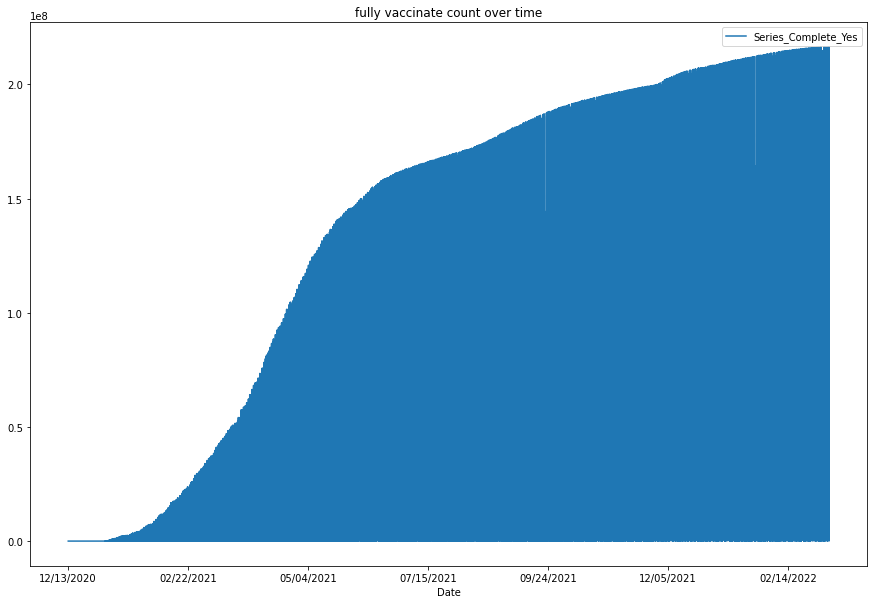

In [170]:
part_of_data = data[['Date', 'Demographic_category', 'Series_Complete_Yes']]
part_of_data.plot(x='Date', y='Series_Complete_Yes', figsize=(15,10), title='fully vaccinate count over time')

<AxesSubplot:title={'center':'Vaccinated with at least one does for age group 18-24 over time'}, xlabel='Date', ylabel='log(total count)'>

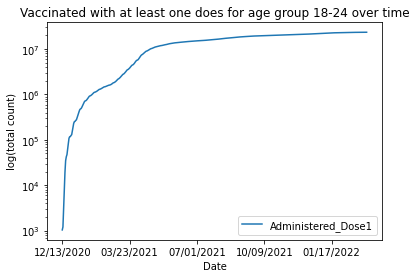

In [145]:
#select columns
df2 = df[['Date', 'Administered_Dose1']]
df2.plot(x='Date', y='Administered_Dose1',logy=True, title='Vaccinated with at least one does for age group 18-24 over time',
xlabel='Date', ylabel='log(total count)')

<AxesSubplot:title={'center':'Total count of fully vaccinated female in demographic category over time'}, xlabel='Date', ylabel='log(count)'>

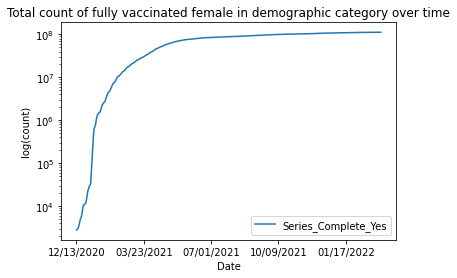

In [146]:
# create another plot

df = data[data['Demographic_category']=='Sex_Female']
df2 = df[['Date', 'Series_Complete_Yes']]
df2.plot(x='Date', y='Series_Complete_Yes',logy=True, title='Total count of fully vaccinated female in demographic category over time',
xlabel='Date', ylabel='log(count)')

<AxesSubplot:title={'center':'Total count of fully vaccinated male in demographic category over time'}, xlabel='Date', ylabel='log(count)'>

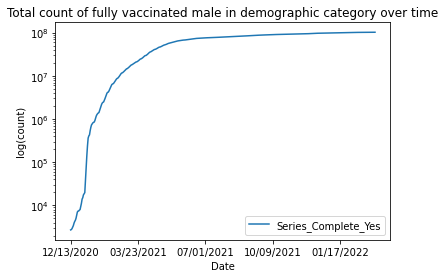

In [166]:
# create another plot

df = data[data['Demographic_category']=='Sex_Male']
df2 = df[['Date', 'Series_Complete_Yes']]
df2.plot(x='Date', y='Series_Complete_Yes',logy=True, title='Total count of fully vaccinated male in demographic category over time',
xlabel='Date', ylabel='log(count)')

Create a pivot table and plot some data from that pivot table


In [147]:
column = 'Series_Complete_Yes'
df3 = pd.pivot_table(data, values=column, index=["Date"], columns=["Demographic_category"])
df3

Demographic_category,Age_known,Age_unknown,Ages_12-15_yrs,Ages_12-17_yrs,Ages_16-17_yrs,Ages_18-24_yrs,Ages_25-39_yrs,Ages_40-49_yrs,Ages_5-11_yrs,Ages_50-64_yrs,...,Race_eth_NHMult_Oth,Race_eth_NHNHOPI,Race_eth_NHWhite,Race_eth_known,Race_eth_unknown,Sex_Female,Sex_Male,Sex_known,Sex_unknown,US
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2021,47102,2,107,212,105,1853,11693,9198,14,14885,...,3135,154,22605,33535,13569,29134,17594,46728,376,47104
01/01/2022,208362980,5881,8859284,13777787,4918503,18266200,43650611,29379846,4702808,50280621,...,9586193,510173,91952094,161254786,47113993,108561373,98300740,206862113,1506748,208368861
01/02/2021,49940,2,108,215,107,1944,12460,9682,14,15661,...,3408,156,23879,35522,14420,30745,18793,49538,404,49942
01/02/2022,208452781,5881,8865320,13786366,4921046,18274680,43666774,29388083,4738329,50290054,...,9591464,510444,91984743,161332140,47126440,108606749,98345026,206951775,1506887,208458662
01/03/2021,52378,2,108,217,109,2031,13245,10127,14,16334,...,3601,159,24997,37241,15139,32120,19828,51948,432,52380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/29/2021,208042155,5877,8841772,13752236,4910464,18238323,43593924,29348473,4584640,50238497,...,9567871,508900,91832014,160985135,47062815,108396918,98145378,206542296,1505736,208048032
12/30/2020,37327,1,99,192,93,1439,9492,7569,11,11847,...,2470,145,16867,25793,11535,22980,14014,36994,334,37328
12/30/2021,208254759,5880,8853233,13769083,4915850,18257023,43630905,29368710,4664702,50265486,...,9579558,509897,91910317,161163426,47097131,108506514,98247587,206754101,1506538,208260639


Text(0.5, 1.0, 'Fully vaccinated count over diff demographic groups')

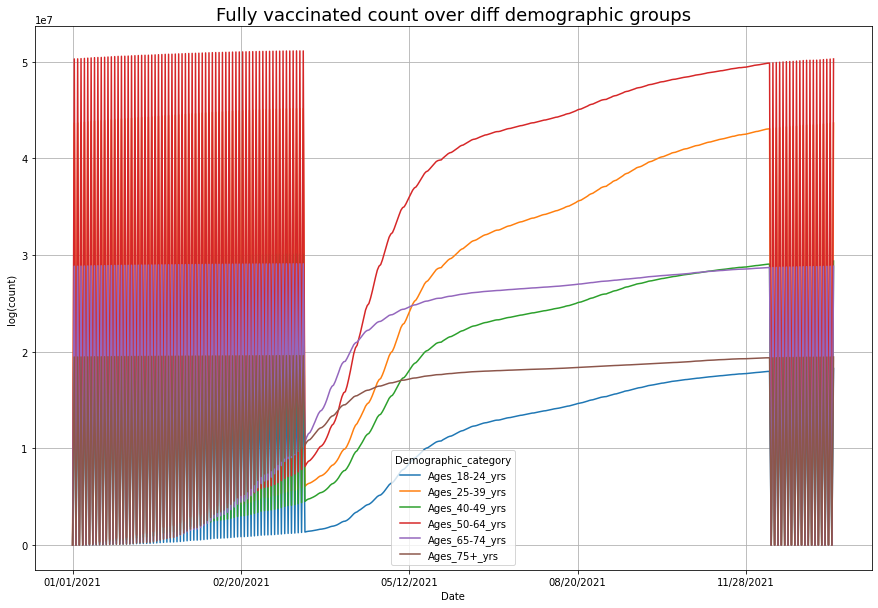

In [151]:
df3 = df3[['Ages_18-24_yrs','Ages_25-39_yrs', 'Ages_40-49_yrs','Ages_50-64_yrs','Ages_65-74_yrs', 'Ages_75+_yrs']]
df3.plot(figsize=(15,10),  ylabel='log(count)')
plt.grid()
plt.title('Fully vaccinated count over diff demographic groups',fontsize=18)

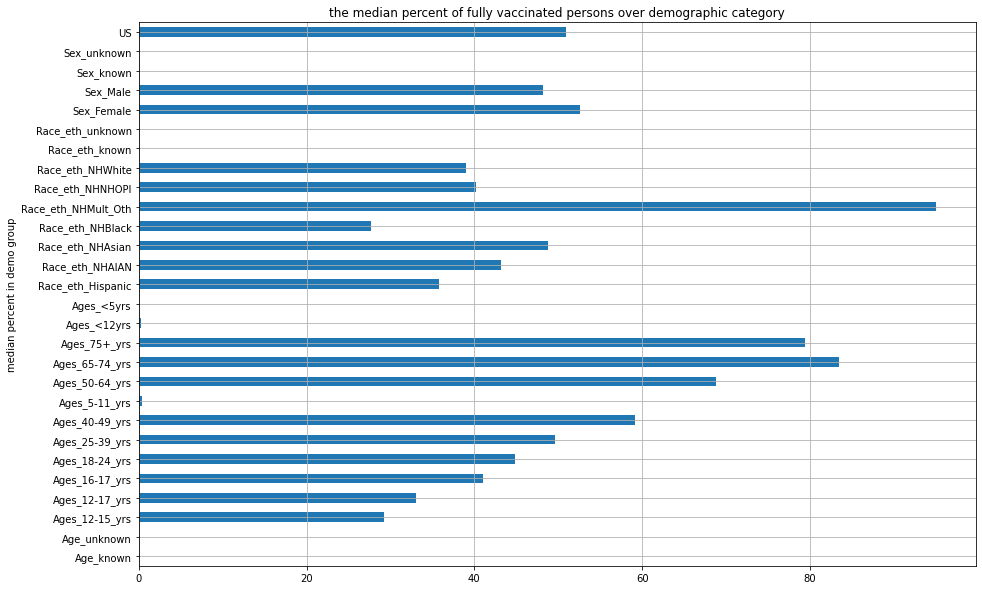

In [165]:
df4 = data.groupby(['Demographic_category'])['Series_Complete_Pop_pct_agegroup'].median()
df4.plot.barh(figsize=(15,10), xlabel='median percent in demo group', title='the median percent of fully vaccinated persons over demographic category')
plt.grid()

### Discussion
1. which age group has the highest/lowest fully vaccination people?
Based on the 'Fully vaccinated count over diff demographic groups' graph, age group 65-74 had the highest fully vaccination rate few months before 5/12/2021. Now people of age 50-64 has the highest. Younger people, of age group 18-24 has the lowest fully vavvination people.
2. Does fully vaccination rate differ in ethniciies?
Yes. Based on the 'the median percent of fully vaccinated persons over demographic category' bar graph, peopole of color has a lower vaccination percentage in their ethnic groups. Asian Americans tend to have a higher vaccination median percentage. Black Americans has the lowest median percentage of fully vaccinated people.
3. When did the fully vaccinated rate peak over all group of people?
Based on the 'fully vaccinate count over time' graph, the peak occured sometime around 5/2021 